In [1]:
import os
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import sys
import numpy as np
import pandas as pd
import regex as re

In [12]:
chromedriver = "~/Downloads/chromedriver" # path to the chromedriver executable
chromedriver = os.path.expanduser(chromedriver)
print('chromedriver path: {}'.format(chromedriver))
sys.path.append(chromedriver)
driver = webdriver.Chrome(chromedriver)

chromedriver path: /Users/williamyee/Downloads/chromedriver


In [26]:

zillow_url = "https://www.zillow.com/homes/recently_sold/94116"
driver.get(zillow_url)


In [27]:

soup= BeautifulSoup(driver.page_source, 'lxml')

<!DOCTYPE html>
<html class="zsg-theme-modernized fonts-stage-2 yui3-js-enabled z-app-search" itemscope="" itemtype="http://schema.org/Organization" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/product#">
 <head id="yui_3_18_1_1_1554780013287_727">
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="//www.zillowstatic.com" rel="dns-prefetch"/>
  <link href="//fonts.googleapis.com" rel="dns-prefetch"/>
  <link href="//photos.zillowstatic.com" rel="dns-prefetch"/>
  <link crossorigin="true" href="https://www.zillow.com/graphql/" rel="preconnect"/>
  <link crossorigin="true" href="https://mortgageapi.zillow.com" rel="preconnect"/>
  <meta charset="utf-8"/>
  <title>
   Recently Sold Homes in 94116 - 757 Transactions | Zillow
  </title>
  <meta content="Browse data on the 757 recent real estate transactions in 94116. Great for discovering comps, sales history, photo
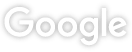

In [28]:
print(soup.prettify())

In [54]:
listings = soup.find_all('a', class_="zsg-photo-card-overlay-link routable hdp-link routable mask hdp-link", href=True)

In [56]:
listings[0].get('href')

'/homedetails/4437-Ulloa-St-San-Francisco-CA-94116/15124373_zpid/'

In [57]:

for row in listings:
    print(row.get('href'))

/homedetails/4437-Ulloa-St-San-Francisco-CA-94116/15124373_zpid/
/homedetails/1730-Pacheco-St-San-Francisco-CA-94116/15114686_zpid/
/homedetails/1911-32nd-Ave-San-Francisco-CA-94116/15114284_zpid/
/homedetails/925-Santiago-St-San-Francisco-CA-94116/2087554102_zpid/
/homedetails/2140-Great-Hwy-San-Francisco-CA-94116/15116752_zpid/
/homedetails/2507-30th-Ave-San-Francisco-CA-94116/15123653_zpid/
/homedetails/1991-21st-Ave-San-Francisco-CA-94116/15114683_zpid/
/homedetails/2610-47th-Ave-San-Francisco-CA-94116/15124578_zpid/
/homedetails/2730-44th-Ave-San-Francisco-CA-94116/15126215_zpid/
/homedetails/2271-40th-Ave-San-Francisco-CA-94116/15118787_zpid/
/homedetails/2038-20th-Ave-San-Francisco-CA-94116/15115713_zpid/
/homedetails/2458-41st-Ave-San-Francisco-CA-94116/15121816_zpid/
/homedetails/701-Quintara-St-San-Francisco-CA-94116/15118082_zpid/
/homedetails/550-Dewey-Blvd-San-Francisco-CA-94116/15133296_zpid/
/homedetails/2587-31st-Ave-San-Francisco-CA-94116/15123732_zpid/
/homedetails/40

In [61]:
house_links = ['https://www.zillow.com'+row['href'] for row in listings]

In [64]:
next_button = soup.find_all("a", class_="on")
next_link = ['https://www.zillow.com'+row['href'] for row in next_button]

In [65]:
def get_house_links(url, driver, pages=20):
    house_links=[]
    driver.get(url)
    for i in range(pages):
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        listings = soup.find_all("a", class_="zsg-photo-card-overlay-link")
        page_data = ['https://www.zillow.com'+row['href'] for row in listings]
        house_links.append(page_data)
        time.sleep(np.random.lognormal(0,1))
        next_button = soup.find_all("a", class_="on")
        next_button_link = ['https://www.zillow.com'+row['href'] for row in next_button]
        if i<19:
            driver.get(next_button_link[0])
    
    return house_links

In [66]:
def get_html_data(url, driver):
    driver.get(url)
    time.sleep(np.random.lognormal(0,1))
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    return soup